# **Data Storytelling: Food Security and Its Impact on School Attendance**


For this assignment, I will be working with a dataset related to school attendance by student groups and districts in the state of Connecticut. I was particularly interested to learn the reason behind food security and its effects on the attendance rate amongst children from PK to 12th grade. During my nutrition class, one of my peers had presented on food security in schools and how that affects a students performance. Although this dataset does not take into account the type of food they are being fed or school performance, I am overall interested to see how food security has impacted attendance.

Link to the dataset: https://catalog.data.gov/dataset/school-attendance-by-student-group-and-district-2021-2022

Question:
I would like to pose the following question in order to explore my dataset: Has food security measures in the state of Connecticut positively impacted the rate of student attendance at schools?

Hypothesis:
Overall I would expect free or reduced meals to help increase the average rate of attendance in schools over the last couple of years; however, there seems to be limitations in the dataset which I will be discussing later in this document.


In [5]:
library(tidyverse)

The following piece of code reads the file from CSV and stores it as school_attendance. It eliminates any data that has a null value so that we can deal with values that are computable. We will be using this to further explore our dataset.


In [15]:
school_attendance <- read_csv("/content/School_Attendance_by_Student_Group_and_District__2021-2022 (1).csv")
school_attendance <- na.omit(school_attendance)
head(school_attendance)

Rows: 2019 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): District code, District name, Category, Student group, Reporting pe...
dbl (6): 2021-2022 student count - year to date, 2021-2022 attendance rate -...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735,0.8155,3916,0.8884,June 2022,07/22/2022
00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487,0.8946,80365,0.9277,June 2022,07/22/2022
00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225,0.8861,193706,0.9314,June 2022,07/22/2022
00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886,0.9299,27507,0.9518,June 2022,07/22/2022
00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111,0.8927,221213,0.9340,June 2022,07/22/2022
00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619,0.8948,45413,0.9389,June 2022,07/22/2022


We will be working with the subset food_security for this analysis.

In [16]:
food_security<- subset(school_attendance, Category == 'Free/Reduced Lunch')
head(food_security)

District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225,0.8861,193706,0.9314,June 2022,07/22/2022
00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886,0.9299,27507,0.9518,June 2022,07/22/2022
00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111,0.8927,221213,0.9340,June 2022,07/22/2022
0010011,Andover School District,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,30,0.9274,31,0.9414,37,0.9401,June 2022,07/22/2022
0020011,Ansonia School District,Free/Reduced Lunch,Free Meal Eligible,1192,0.8893,1217,0.8657,1312,0.9312,June 2022,07/22/2022
0020011,Ansonia School District,Free/Reduced Lunch,Reduced Price Meal Eligible,225,0.9282,213,0.9234,147,0.9563,June 2022,07/22/2022


We will be recreating the table (working with subsets) so that we can find the average rate of attendance for each year amongst all schools. We will also find the minimum and maximum rate of attendance amongst all schools

In [10]:
#finding the average attendence rate for each year and store it in a table named averages_food
averages_food <- food_security %>%
  group_by( `Student group`) %>%
  summarise(`avg_22` = mean(`2021-2022 attendance rate - year to date`),
            `avg_21` = mean(`2020-2021 attendance rate`),
            `avg_20` = mean(`2019-2020 attendance rate`))

#finding the minimum attendence rate for each year and store it in a table named min_food
min_food <- food_security %>%
  group_by( `Student group`) %>%
  summarise(min_22 = min(`2021-2022 attendance rate - year to date`),
            min_21 = min(`2020-2021 attendance rate`),
            min_20 = min(`2019-2020 attendance rate`))

#finding the maximum attendence rate for each year and store it in a table named max_food
max_food <- food_security %>%
  group_by( `Student group`) %>%
  summarise(max_22 = max(`2021-2022 attendance rate - year to date`),
            max_21 = max(`2020-2021 attendance rate`),
            max_20 = max(`2019-2020 attendance rate`))


These tables will be hard to plot based on the year, thus we will change our tables to have a new column year that stores all the values corresponding to it.

In [11]:
# tables with year and average attendance value corresponding to each year
averages_food_year <- averages_food %>%
  pivot_longer(cols = c('avg_22','avg_21','avg_20'),
               names_to = 'year',
               values_to = 'attendence_rate')

# tables with year and min attendance value corresponding to each year
min_food_year <- min_food %>%
  pivot_longer(cols = c('min_22','min_21','min_20'),
               names_to = 'year',
               values_to = 'attendence_rate')

# tables with year and max attendance value corresponding to each year
max_food_year <- max_food %>%
  pivot_longer(cols = c('max_22','max_21','max_20'),
               names_to = 'year',
               values_to = 'attendence_rate')

We can now plot this data to see the trend of maximum attendence in regards to food security. The easiest way to see this would be a bar graph.

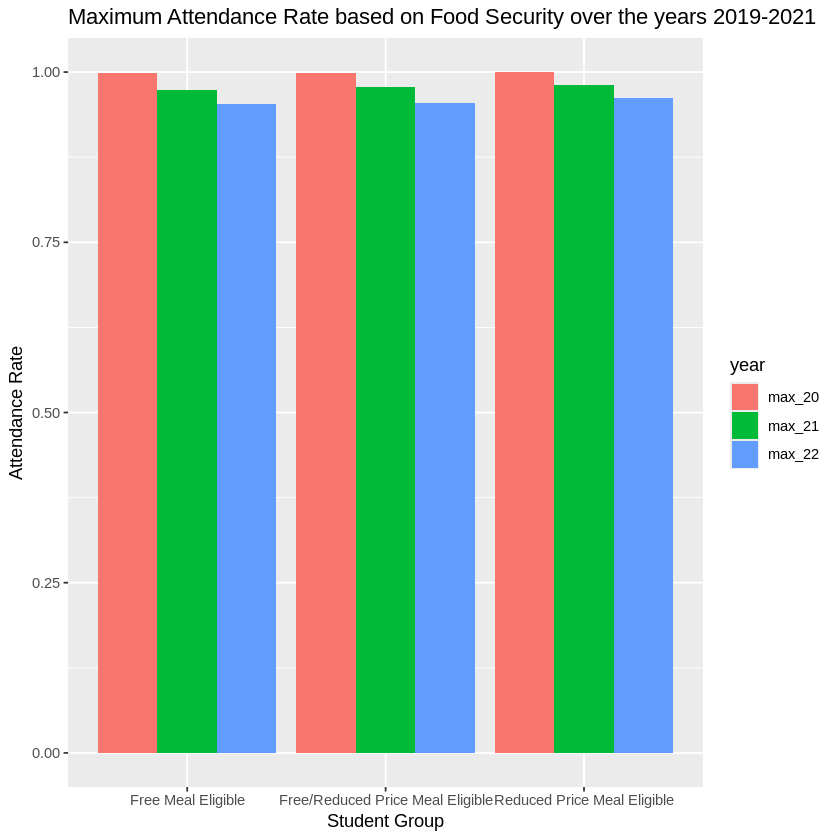

In [12]:
ggplot(max_food_year, aes(x = `Student group`, y = attendence_rate, fill = year)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Maximum Attendance Rate based on Food Security over the years 2019-2021",
       x = "Student Group",
       y = "Attendance Rate")

From the graph above, we can conclude that the maximum attendence has decreased over the years throughout all three student groups.  

We will can create a new graph to see if the trend of minimum attendence in regards to food security differs from the one above.

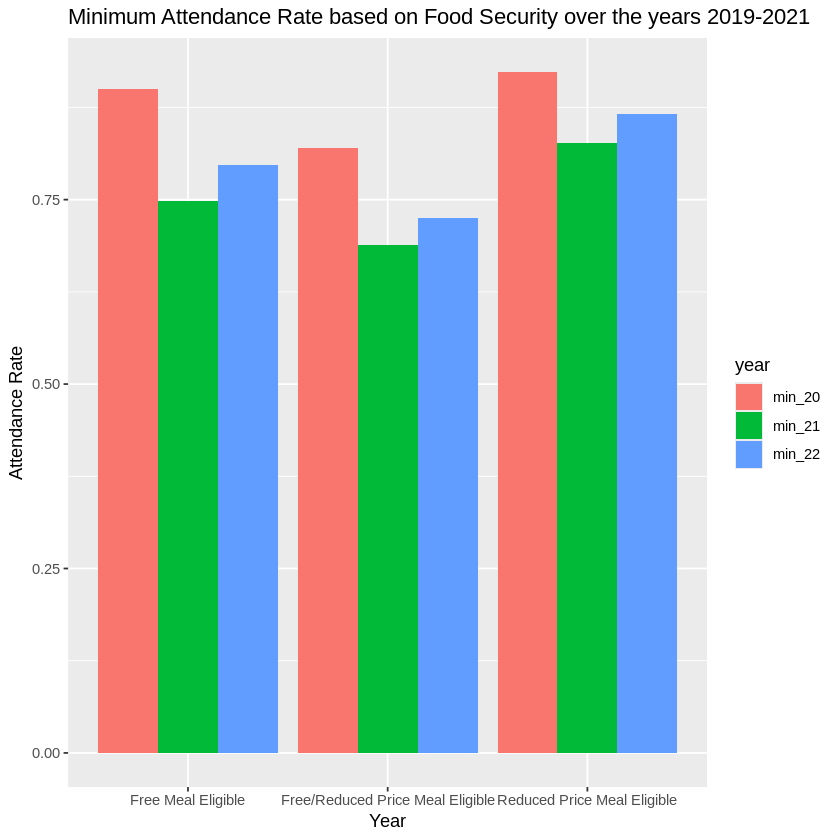

In [13]:
ggplot(min_food_year, aes(x = `Student group`, y = attendence_rate, fill = year)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Minimum Attendance Rate based on Food Security over the years 2019-2021",
       x = "Year",
       y = "Attendance Rate")

We can see that there was a decline in the rate of attendence from 2019-2020 to now; however, the patern seems to remain that there is slight growth from 2020-2021 to 2021-2022.


Finally we can plot the data to see the average trend of attendence in regards to food security.

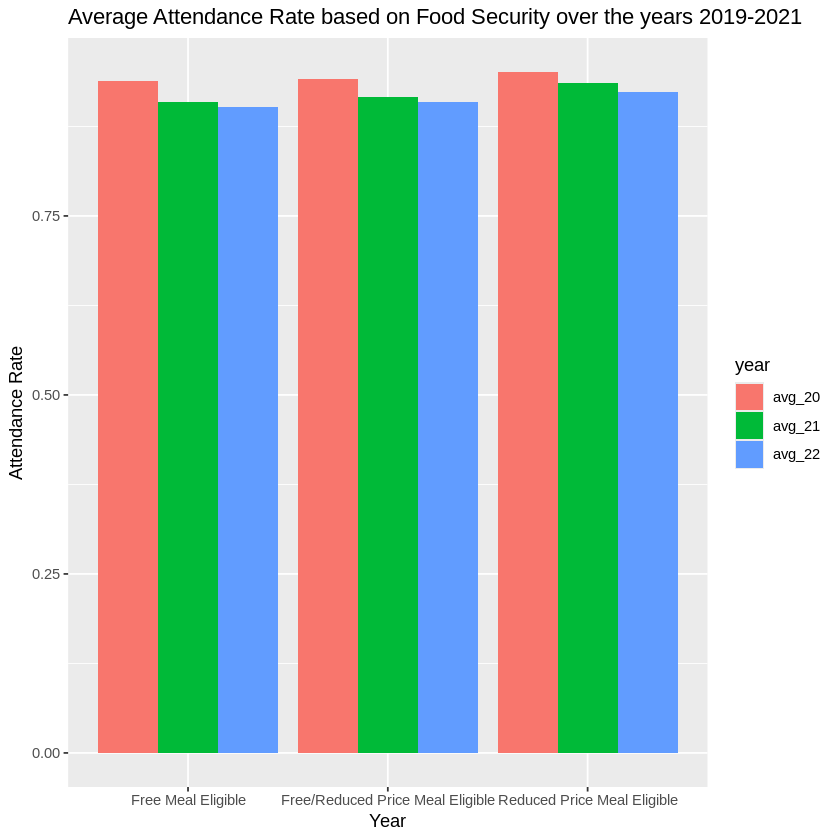

In [14]:
ggplot(averages_food_year, aes(x = `Student group`, y = attendence_rate, fill = year)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Attendance Rate based on Food Security over the years 2019-2021",
       x = "Year",
       y = "Attendance Rate")

Note that much like the maximum attendence rate, the average rate of attendance based off of food security is also decreasing over the years. This is an interesting trend to see as per my hypothesis, I had expected the opposite to occur. However, there are many considerations and limitations that must be discussed with this dataset. Firstly, this dataset was collected upon a three year span, two of which were impacted heavily by covid. As we continue to recognize this, we may be able to ask how this dataset was collected as many schools were virtual during those years. Secondly, we must note that the sample size is also fairly small as it only involves the state of Connecticut which may lead us to the question how would the pattern differ in other states or even throughout the country? Some further questions could be: how would our results defer if we looked at a longer time period? Would we see an increase or decrease in the number of school attendance provided free meals?